This Notebooks aims to show how to construct a Basis from measurments and create a function to represent data in the trained basis.

The dataset used is "[UTKFace Aligned&Cropped Faces](https://susanqq.github.io/UTKFace/)" which contains many pictures of different faces under different lightning conditions. Those faces will be used to create basis of faces, called Eigenfaces which the can be used to represent any faces . 

In [1]:
import numpy as np
import scipy
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

import cv2
import os


In [19]:
instances = []

# load the images
for filepath in os.listdir('./Data/UTKFace'):
    tmp = cv2.imread('./Data/UTKFace/{0}'.format(filepath),0)
    instances.append(cv2.resize(tmp, (100,100)))
    
instances = np.array(instances)

In [20]:
instances_reshaped = instances.reshape(instances.shape[0],instances.shape[1]*instances.shape[2]).T

# instances_reshaped[1].reshape(200,200)
# plt.imshow(instances_reshaped[1].reshape(200,200))
instances_reshaped.shape

(10000, 4509)

In [21]:
U,S,V = scipy.linalg.svd(instances_reshaped,full_matrices=False)
S = np.diag(S)

In [22]:
print(U.shape, S.shape, V.shape) 

(10000, 4509) (4509, 4509) (4509, 4509)


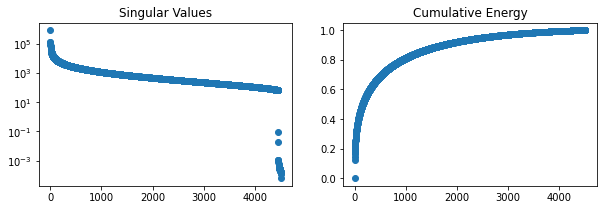

In [23]:
fig,axs = plt.subplots(1,2, figsize=(10,3))

k = np.arange(0,S.shape[0])
norm_one_full = np.sum(np.diag(S))
norm_one = lambda x: np.sum(np.diag(S[:x,:x])) / norm_one_full

axs[0].scatter(k,S[k,k])
axs[0].set_yscale('log')
axs[0].set_title('Singular Values')
    
axs[1].scatter(k,[norm_one(i) for i in k])
axs[1].set_title('Cumulative Energy')


plt.show()

(10000,)


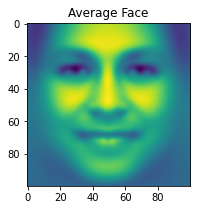

In [24]:
fig,axs = plt.subplots(1 ,figsize=(3,3))

average_face = np.sum(instances_reshaped,axis=1)
print(average_face.shape)
average_face = average_face.reshape(instances.shape[1], instances.shape[2])

axs.imshow(average_face)
axs.set_title('Average Face')

plt.show()

Text(0.5, 0.98, 'Eigenfaces generate from the SVD')

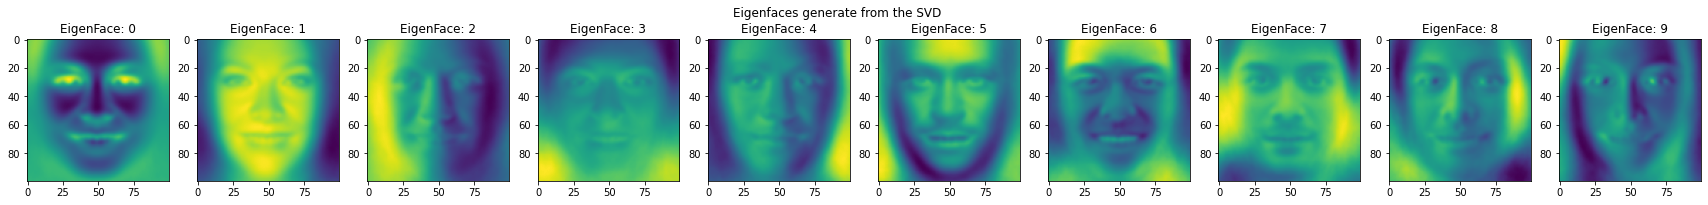

In [138]:
fig,axs = plt.subplots(1,10,figsize=(30, 3))

for i in range(10):
    axs[i].imshow(U[:,i].reshape(instances.shape[1],instances.shape[2]))
    axs[i].set_title('Eigenface: ' + str(i))
plt.suptitle('Eigenfaces generate from the SVD')

Text(0.5, 0.98, 'Eigenfaces generate from the SVD')

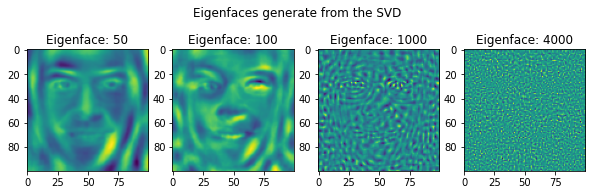

In [144]:
fig,axs = plt.subplots(1,4,figsize=(10, 3))


j=0
for i in [50,100, 1000,4000]:
    axs[j].imshow(U[:,i].reshape(instances.shape[1],instances.shape[2]))
    axs[j].set_title('Eigenface: ' + str(i))
    j = j+1

plt.suptitle('Eigenfaces generate from the SVD')

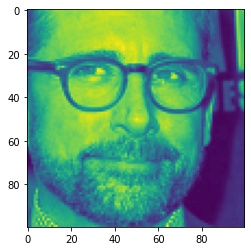

In [146]:
test_image = Image.open('./Data/TestFaces/51_0_0_20170111171747340.jpg.chip.jpg').convert('L')
test_image = np.array(test_image)
test_image = cv2.resize(test_image,(100,100))

plt.imshow(test_image)

test_image = test_image.reshape(test_image.shape[0] * test_image.shape[1],1)
# test_image = test_image - average_face.reshape(instances.shape[1] * instances.shape[2],1)

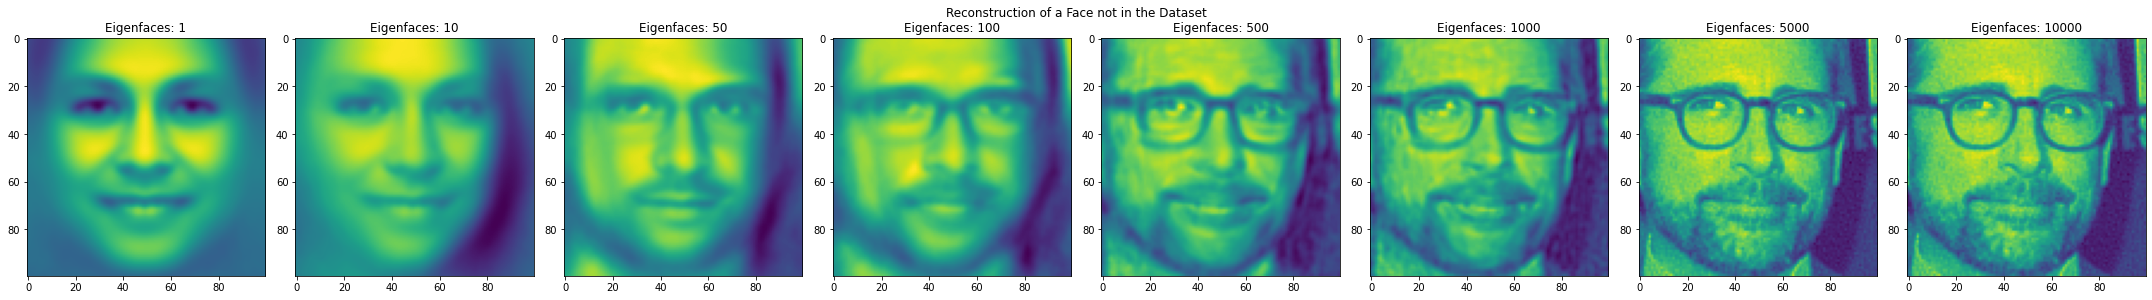

In [147]:
fig,axs = plt.subplots(1,8,figsize=(30, 4))

j=0
for i in [1,10,50,100,500,1000,5000, 10000]:
    axs[j].imshow(np.dot(np.matmul( U[:,:i], U[:,:i].T) , test_image).reshape(100,100))
    axs[j].set_title('Eigenfaces: ' + str(i))
    j = j+1

plt.suptitle('Reconstruction of a Face not in the Dataset')
plt.tight_layout()

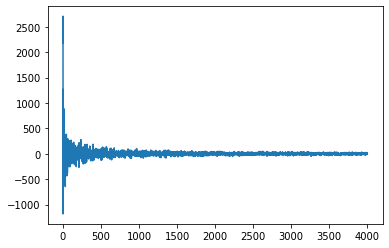

In [159]:
x = np.arange(1,4000)

fnk = lambda i: np.dot(U[:,i].T, test_image)
plt.plot(x,[ fnk(i) for i in x])

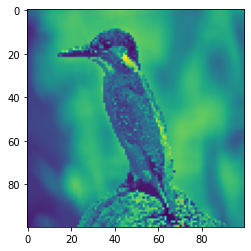

In [125]:
test_image = Image.open('./Data/bird.jpg').convert('L')
test_image = np.array(test_image)
test_image = cv2.resize(test_image,(100,100))

plt.imshow(test_image)

test_image = test_image.reshape(test_image.shape[0] * test_image.shape[1],1)
# test_image = test_image - average_face.reshape(instances.shape[1] * instances.shape[2],1)

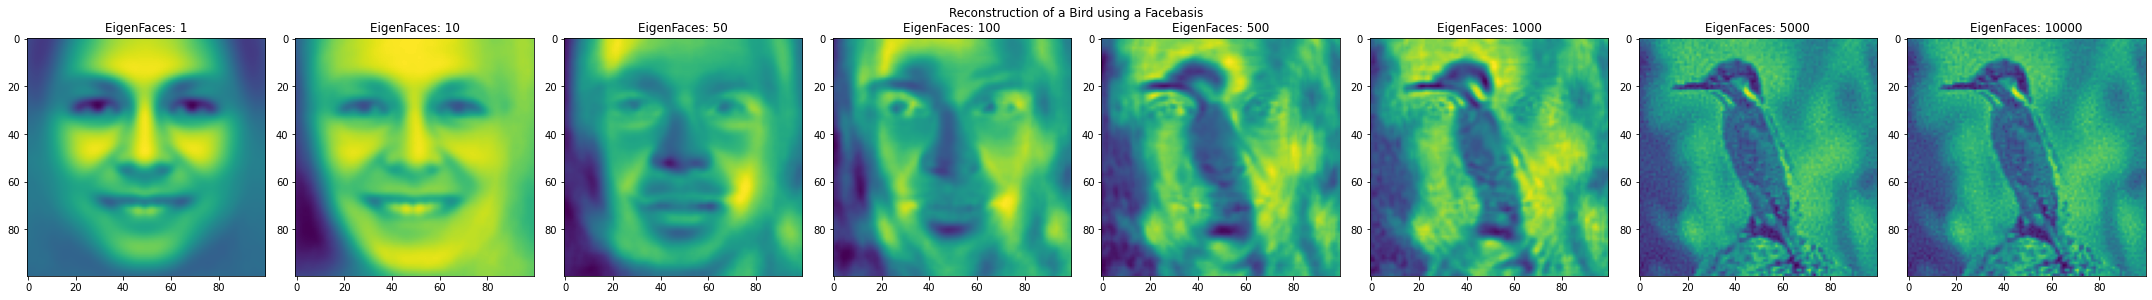

In [126]:
fig,axs = plt.subplots(1,8,figsize=(30, 4))

j=0
for i in [1,10,50,100,500,1000,5000, 10000]:
    axs[j].imshow(np.dot(np.matmul( U[:,:i], U[:,:i].T) , test_image).reshape(100,100))
    axs[j].set_title('EigenFaces: ' + str(i))
    j = j+1

plt.suptitle('Reconstruction of a Bird using a Facebasis')
plt.tight_layout()